In [5]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [6]:
#fetching data into variable
df = pd.read_csv(r"C:\\Users\Zenbook/Downloads\avocado.csv")
df.head()

,index,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
#as we drop index column beacuse it just kind of id which have no effect on dataset
df.drop('index',inplace=True,axis=1)
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
#checking the total rows and total columns
df.shape

(18249, 13)

In [9]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [10]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [11]:
#Extract the Month from DOB into separate column
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [12]:
#Extract the Date from DOB into separate column
df['Date'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [13]:
#Extract the Date from DOB into separate column
df['Date'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,1,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [14]:
#checking the value counts of each date
df.Date.value_counts()

1    18249
Name: Date, dtype: int64

In [15]:
#checking the value counts of each type
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
#co relation of total volume to total bag
df[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [17]:
#checking the average year of volume of avacado per year
df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [18]:
#checking the organic type of avacado 
organic = df[df['type'] == 'organic']
organic

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,1,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12
9127,1,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12
9128,1,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12
9129,1,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12
9130,1,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [19]:
#checking the mean of price at each year of organic type of avacado
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

In [20]:
#finding how much type of avacado is sell in last 4 year
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [21]:
#total no of sale in each year of  4 years
df.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   PLU_4046      18249 non-null  float64
 4   PLU_4225      18249 non-null  float64
 5   PLU_4770      18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


<Axes: >

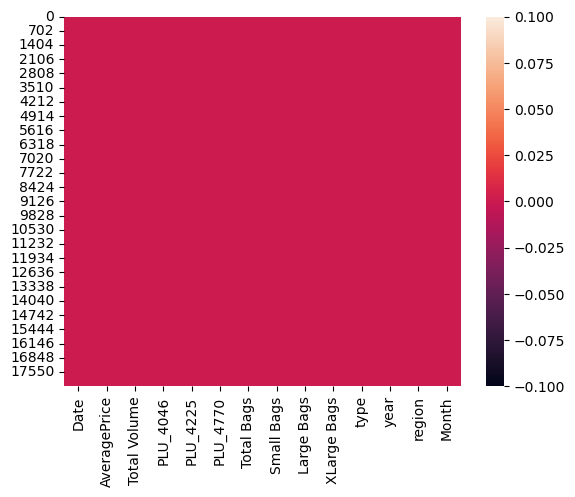

In [23]:
#checking null values using heatmap
sns.heatmap(df.isnull())

In [24]:
df.describe()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.0,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.0,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.0,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,1.0,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.0,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.0,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.0,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,1.0,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


<Axes: xlabel='year', ylabel='AveragePrice'>

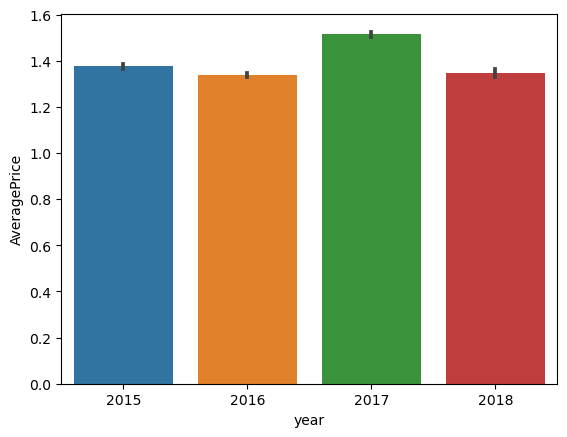

In [25]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

<Axes: xlabel='Month', ylabel='AveragePrice'>

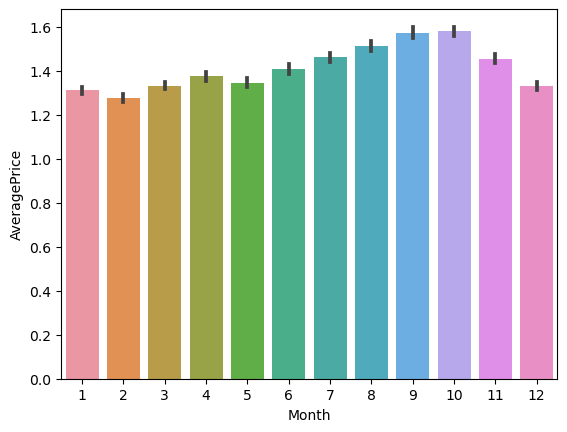

In [26]:
#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )

<Axes: xlabel='year', ylabel='AveragePrice'>

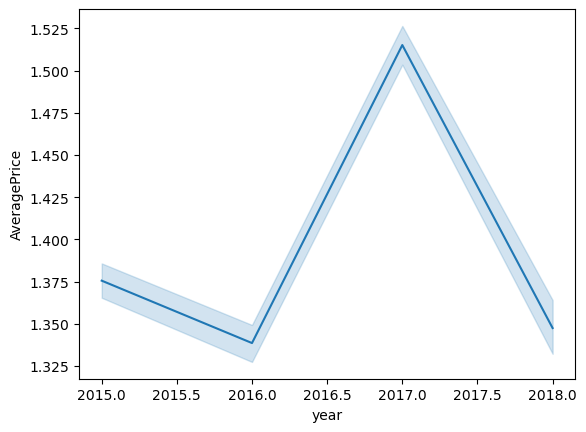

In [27]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=df)

<Axes: xlabel='type', ylabel='AveragePrice'>

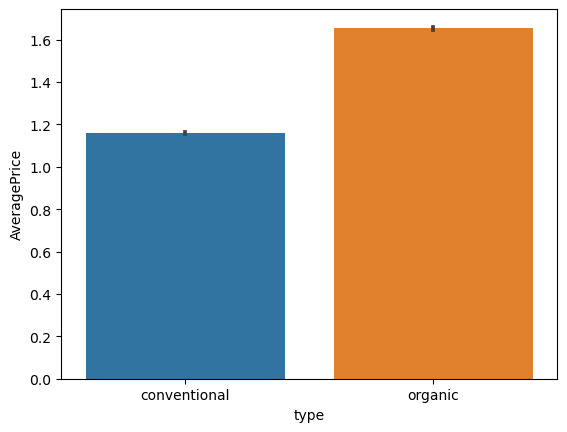

In [28]:
#checking ratio of type and price that which year had max average price
sns.barplot(x = "type" , y = "AveragePrice" ,data=df )

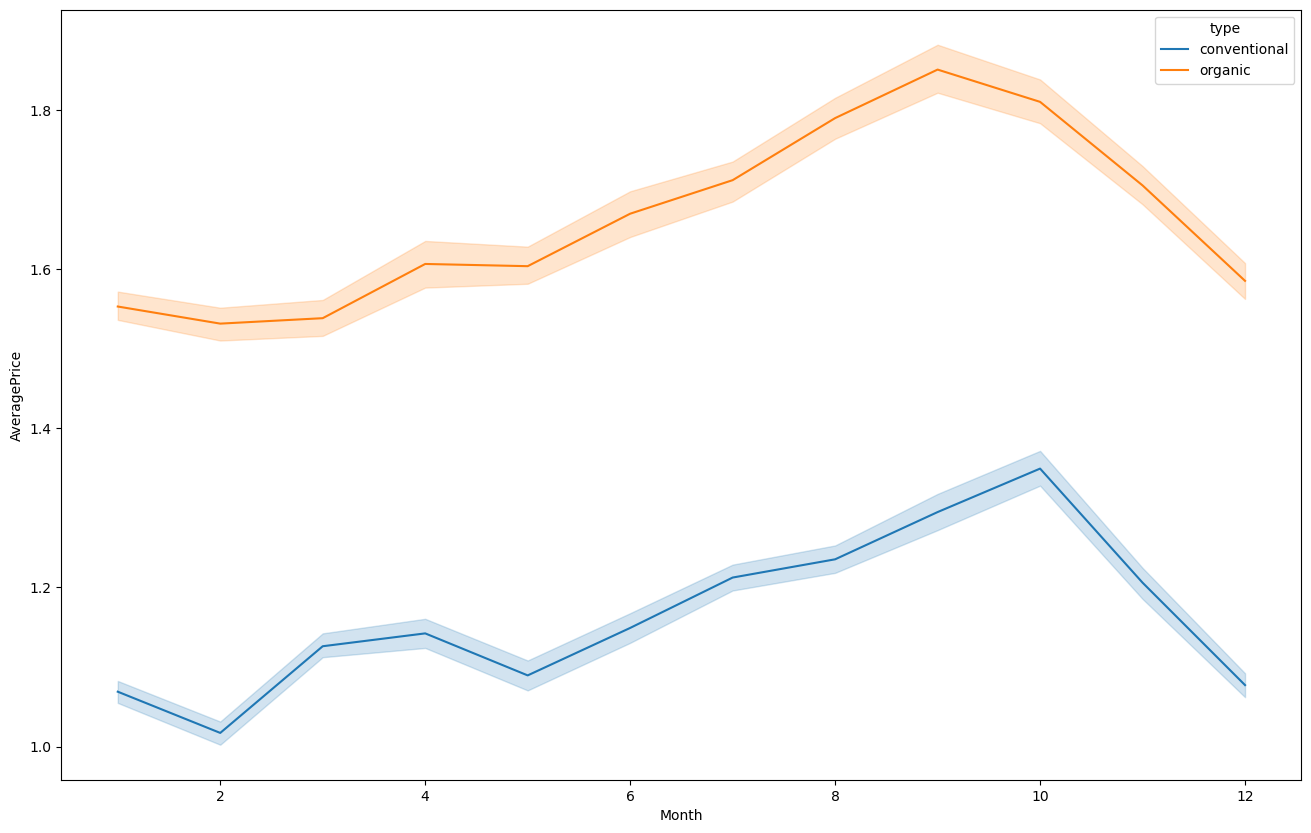

In [29]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Text(0.5, 1.0, 'ration of Price and Region')

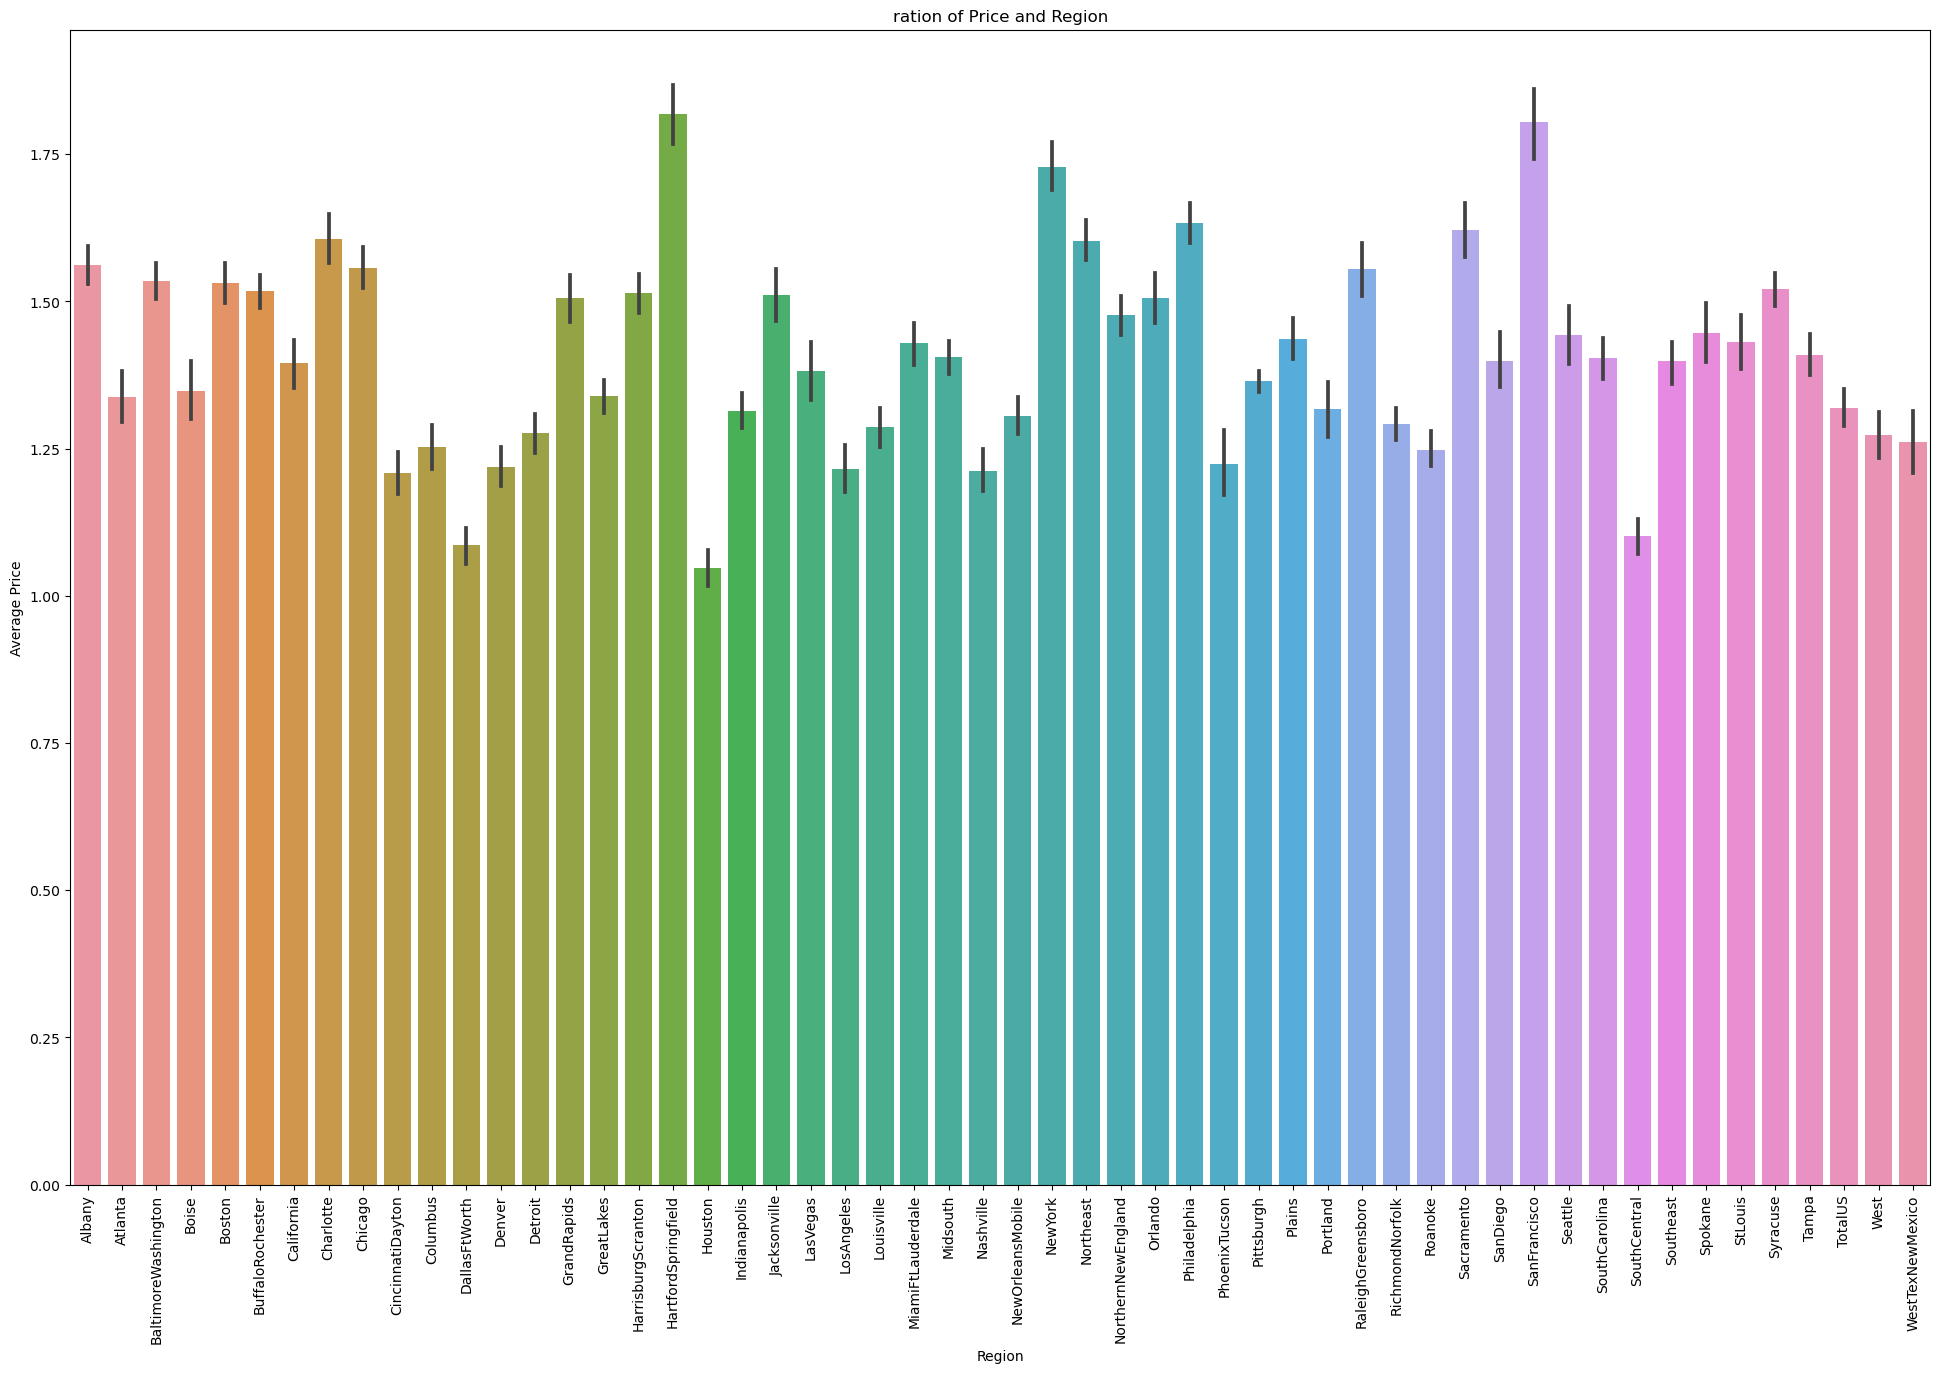

In [30]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('ration of Price and Region')

Text(0.5, 1.0, 'Average_Price')

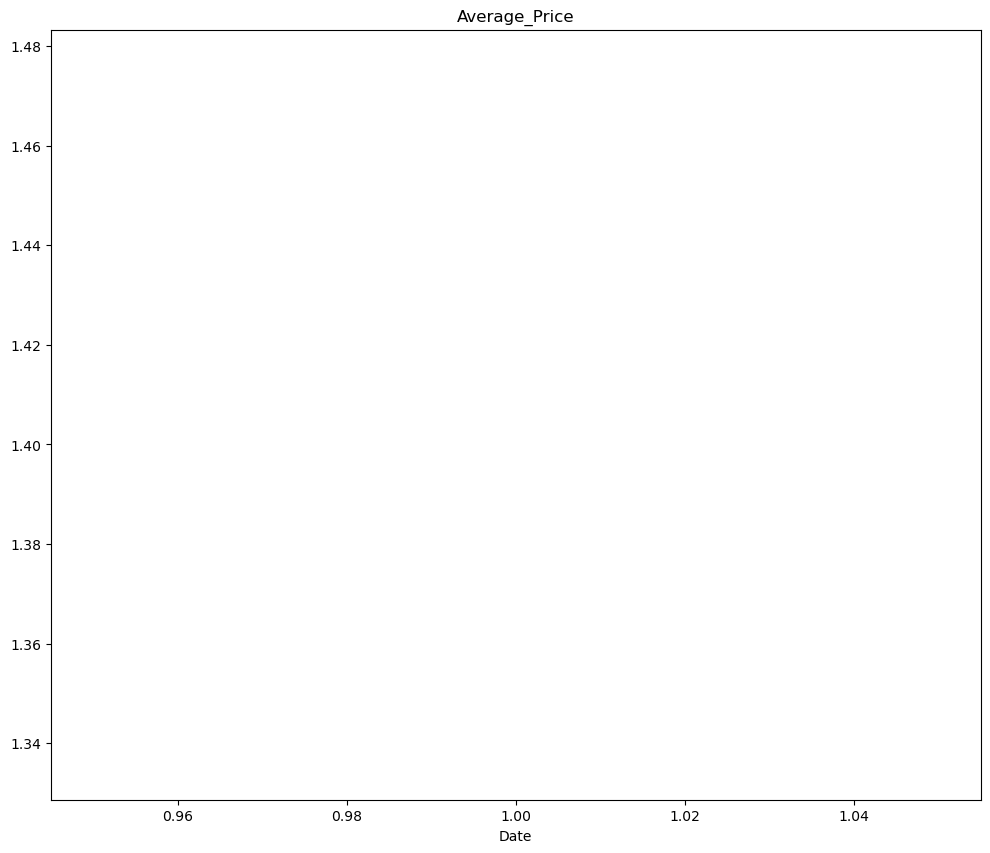

In [32]:
date=df.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')

Text(0.5, 1.0, 'Average_Price')

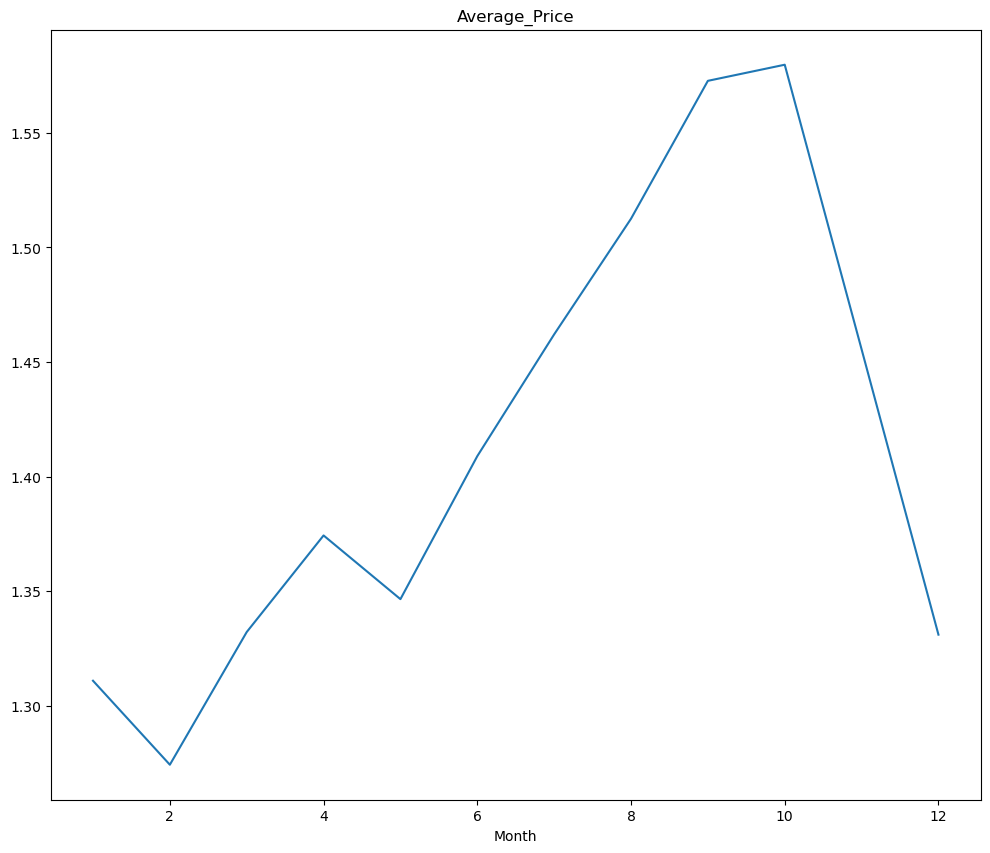

In [33]:
month=df.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': 'PLU_4046'}>],
       [<Axes: title={'center': 'PLU_4225'}>,
        <Axes: title={'center': 'PLU_4770'}>,
        <Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>],
       [<Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

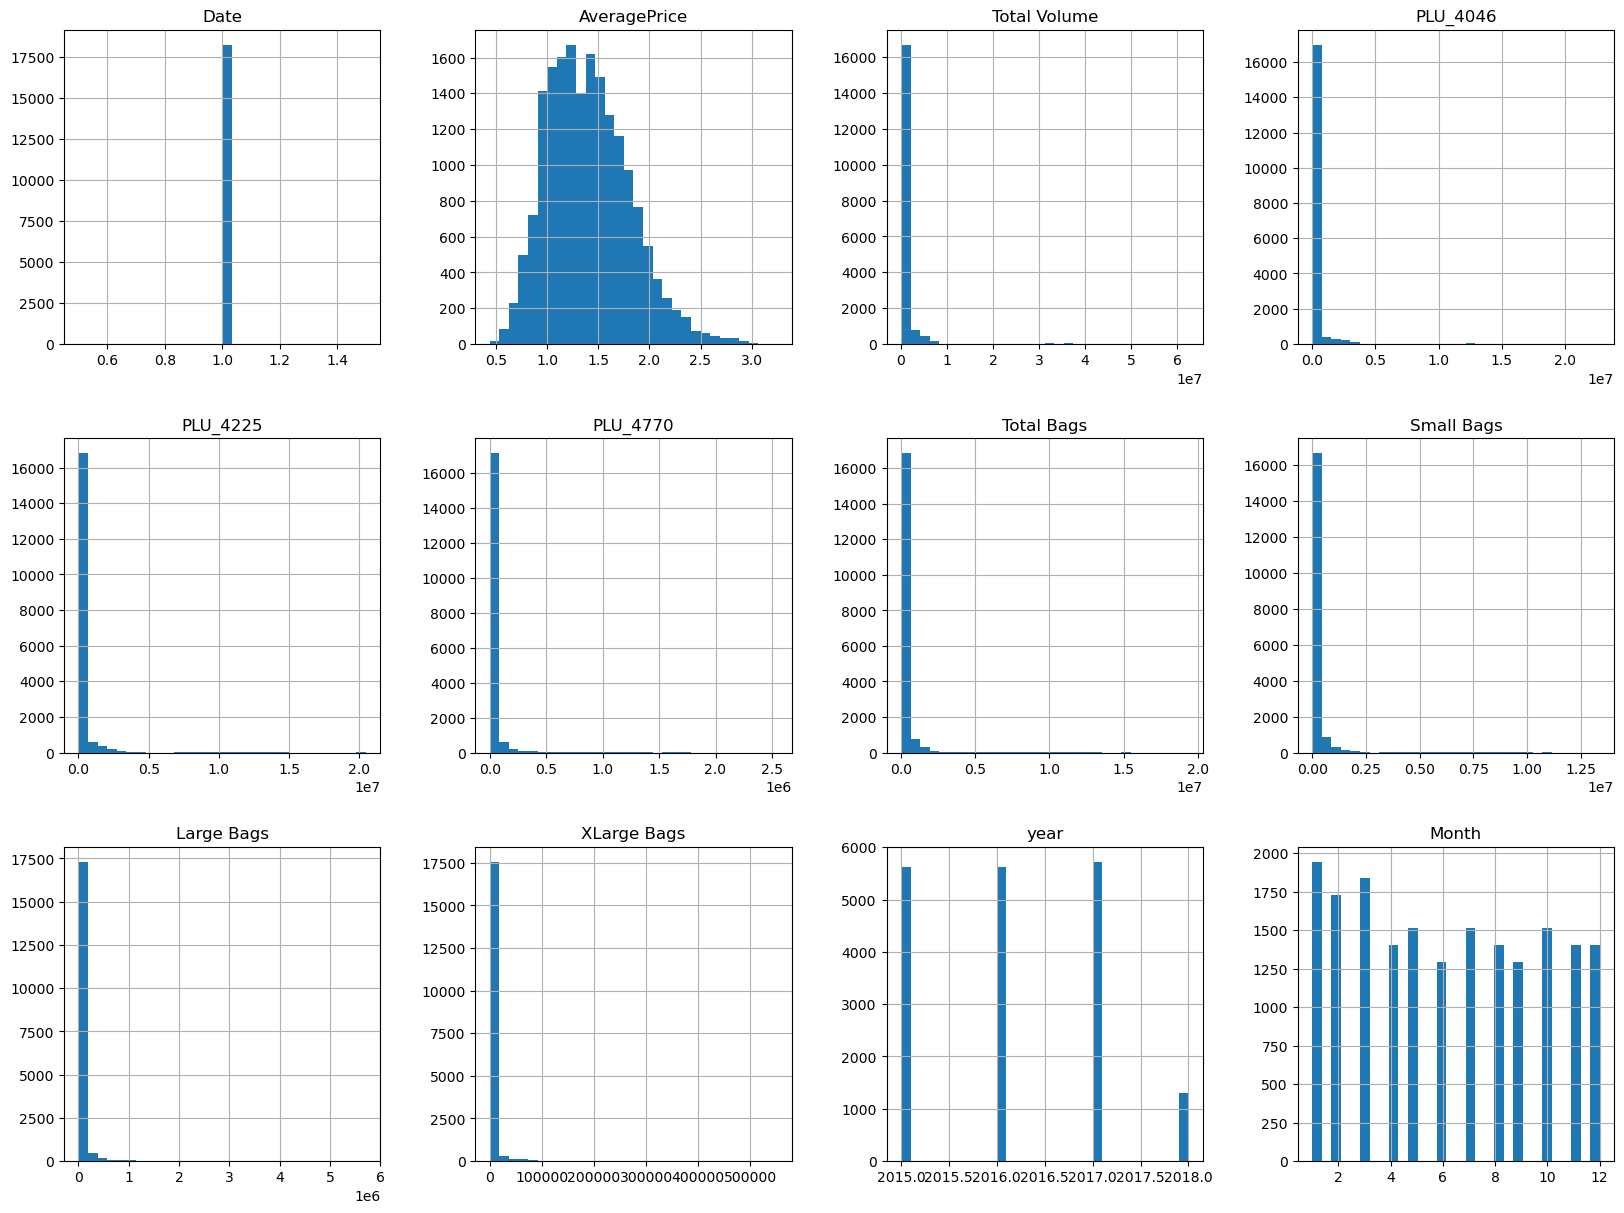

In [34]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [35]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [37]:
#Making the categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

Date              int64
AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object


In [38]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,1,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,1,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


Date               Axes(0.125,0.712609;0.133621x0.167391)
AveragePrice    Axes(0.285345,0.712609;0.133621x0.167391)
Total Volume     Axes(0.44569,0.712609;0.133621x0.167391)
PLU_4046        Axes(0.606034,0.712609;0.133621x0.167391)
PLU_4225        Axes(0.766379,0.712609;0.133621x0.167391)
PLU_4770           Axes(0.125,0.511739;0.133621x0.167391)
Total Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Small Bags       Axes(0.44569,0.511739;0.133621x0.167391)
Large Bags      Axes(0.606034,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.766379,0.511739;0.133621x0.167391)
type                Axes(0.125,0.31087;0.133621x0.167391)
year             Axes(0.285345,0.31087;0.133621x0.167391)
region            Axes(0.44569,0.31087;0.133621x0.167391)
Month            Axes(0.606034,0.31087;0.133621x0.167391)
dtype: object

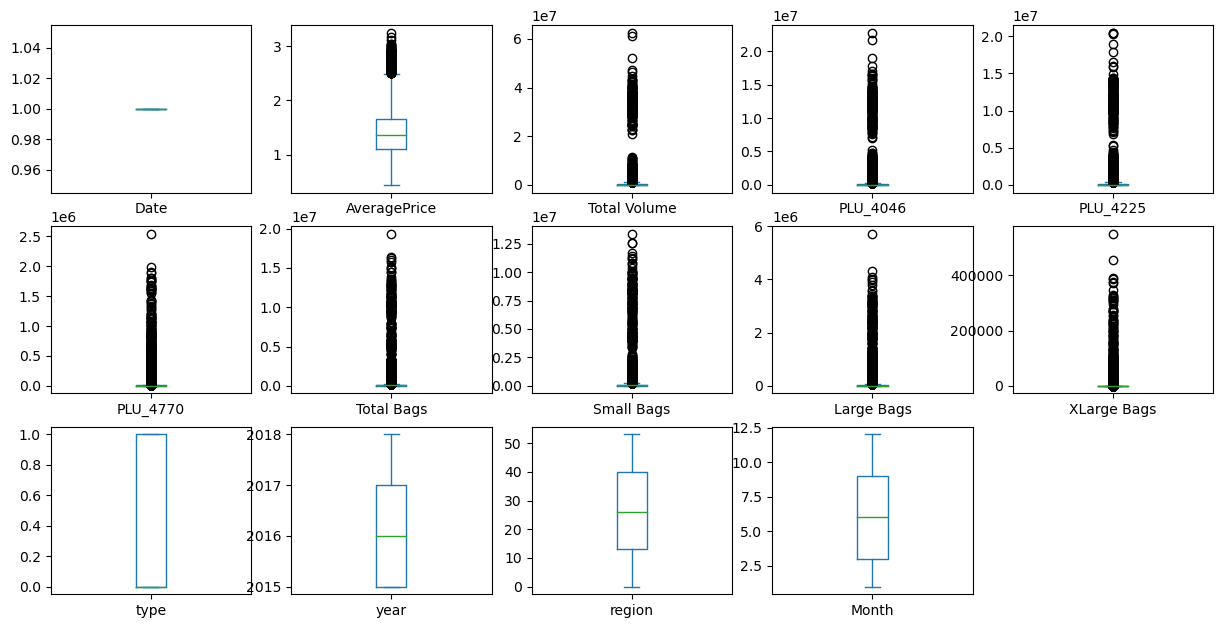

In [39]:
df.type  =df.type.astype(float)
#plotting the boxplot of each column to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [40]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

       Date  AveragePrice  Total Volume  PLU_4046  PLU_4225  PLU_4770  \
0       NaN      0.188689      0.227716  0.230816  0.199902  0.212091   
1       NaN      0.139020      0.230427  0.231103  0.208054  0.211997   
2       NaN      1.182069      0.212085  0.231007  0.154478  0.211325   
3       NaN      0.809551      0.223444  0.230741  0.185350  0.211864   
4       NaN      0.312861      0.231538  0.230891  0.208719  0.211834   
...     ...           ...           ...       ...       ...       ...   
18244   NaN      0.556347      0.241373  0.230017  0.243857  0.212540   
18245   NaN      0.755023      0.242296  0.230693  0.242277  0.212540   
18246   NaN      1.152375      0.242331  0.230693  0.243090  0.205766   
18247   NaN      1.301382      0.241625  0.230428  0.242651  0.205774   
18248   NaN      0.531512      0.241253  0.229347  0.243170  0.210450   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year  \
0        0.234170    0.232647    0.222352    

[]

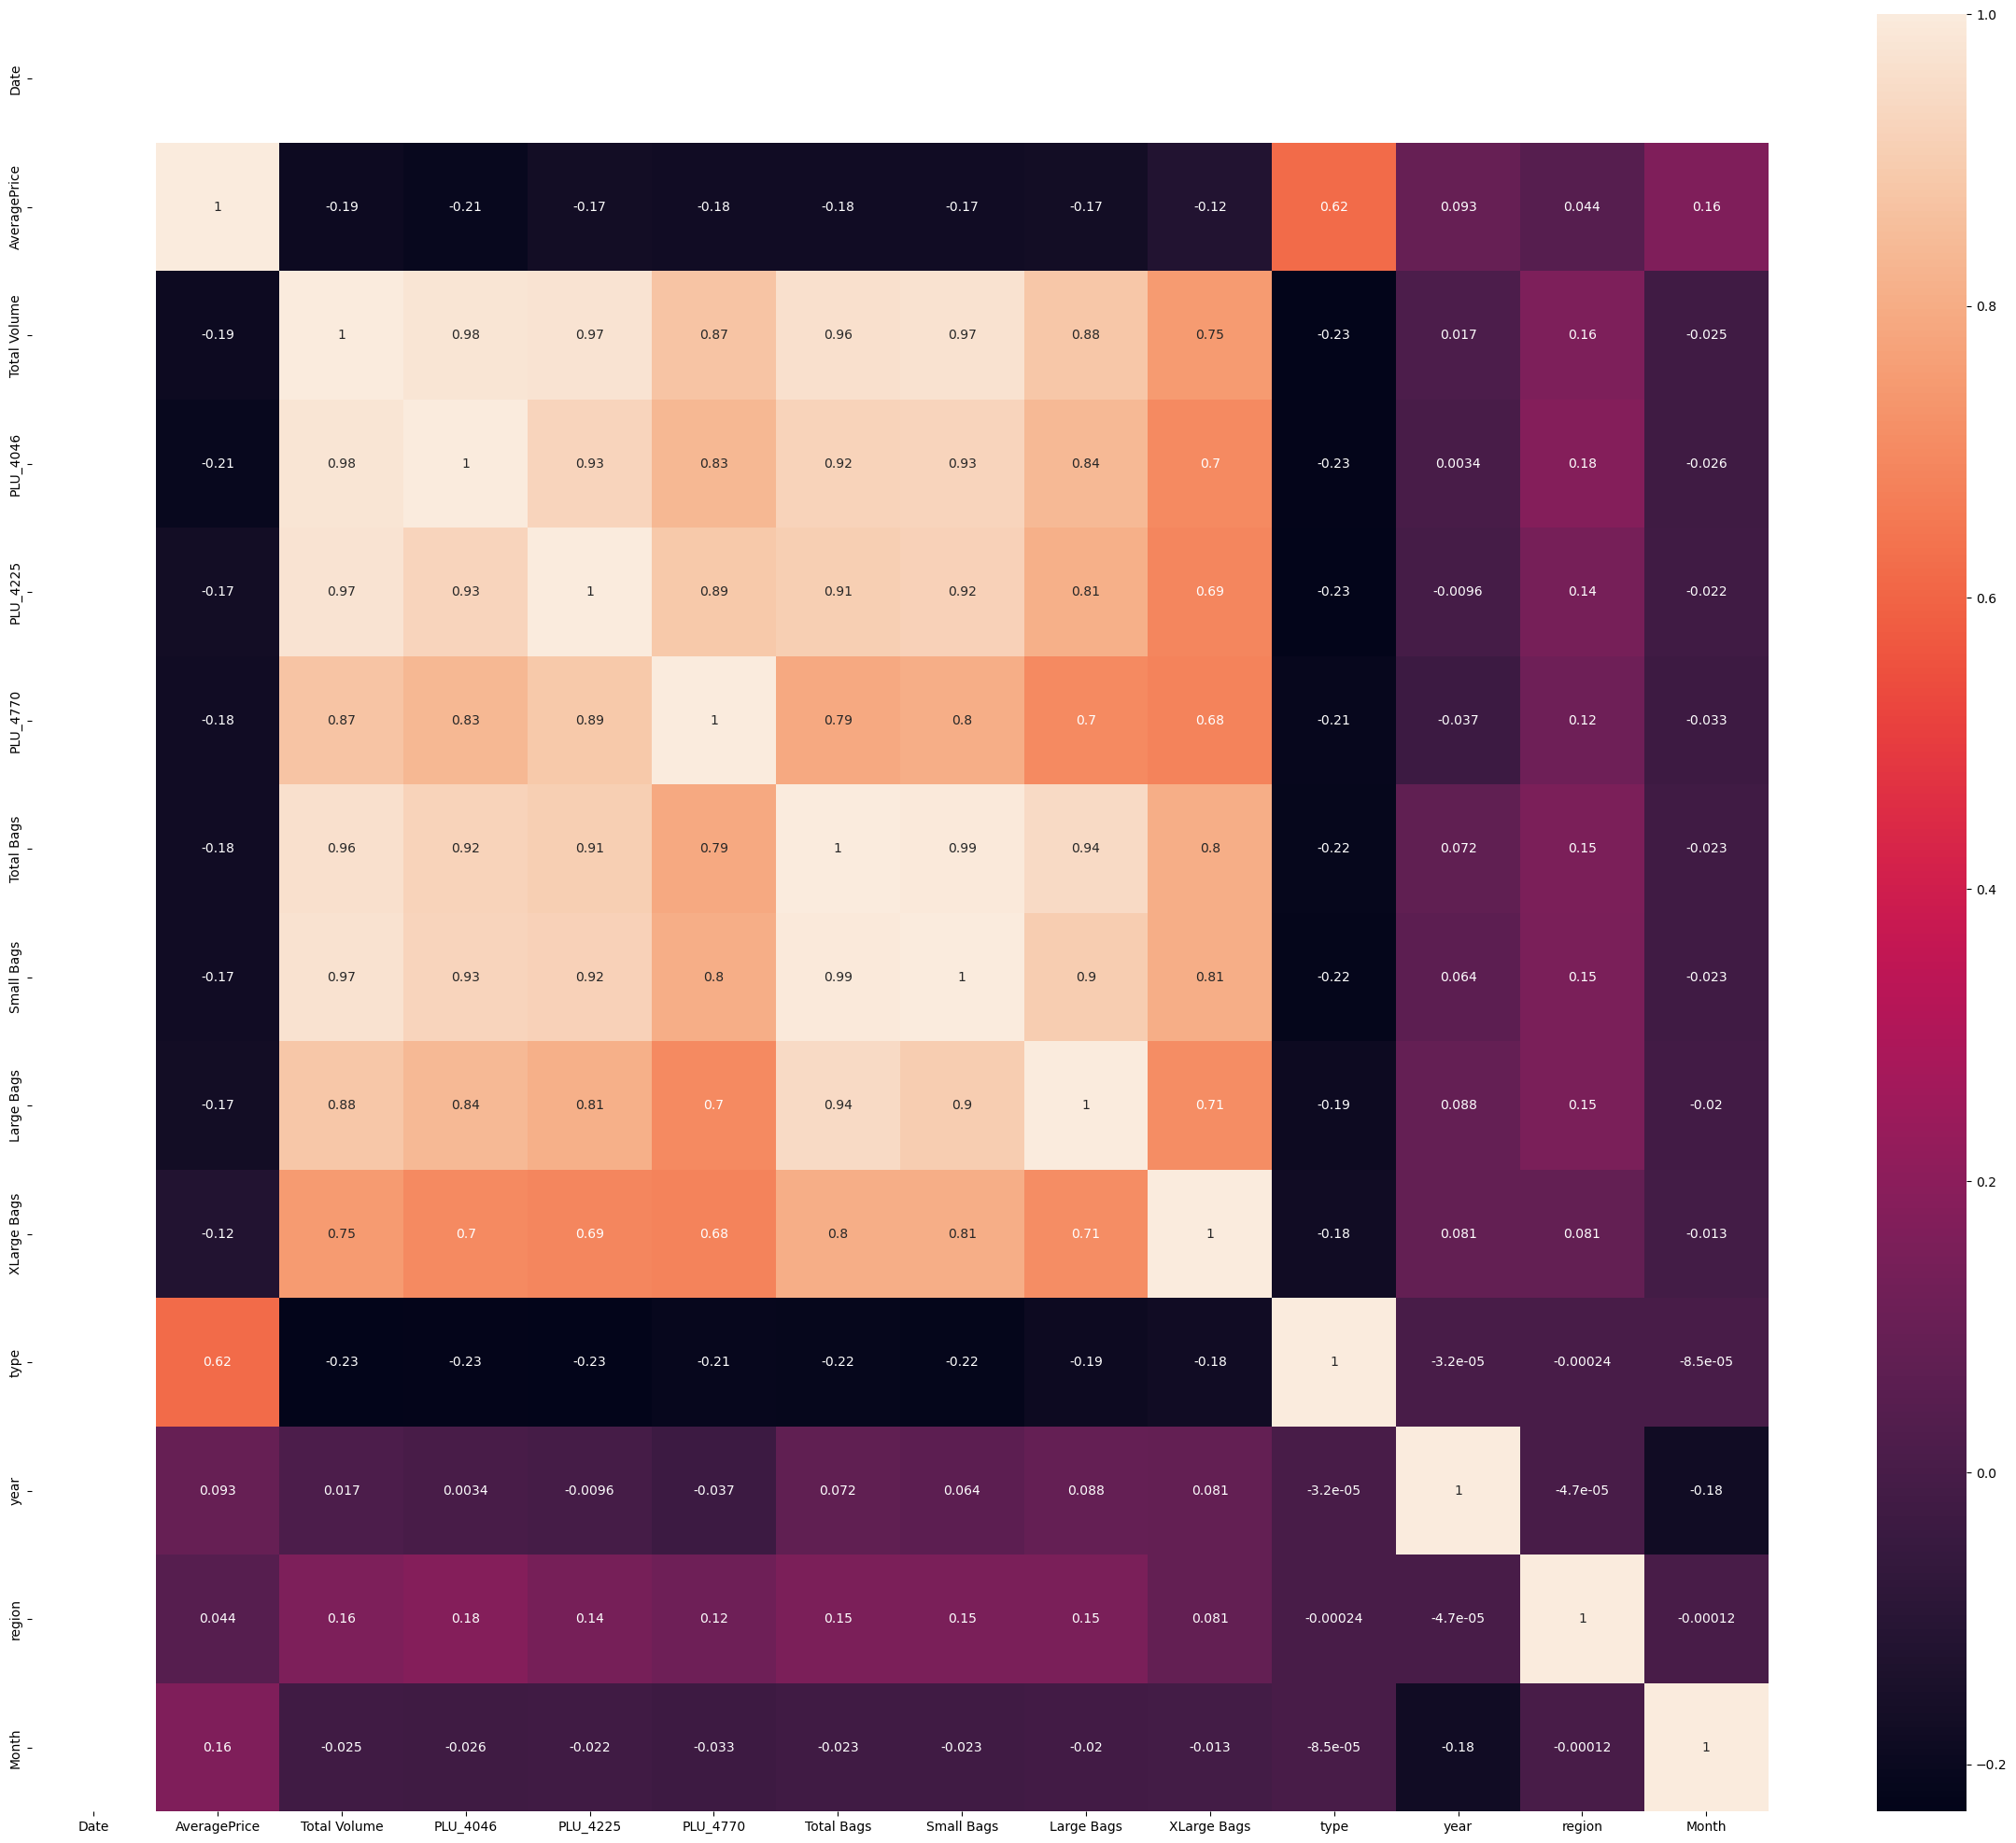

In [41]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

In [42]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 1,  2,  3, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [44]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]

In [45]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outlires',df.shape)

(18249, 14)
(0, 14)
Shape after removing outlires (0, 14)


In [46]:
#now finding the mean value of each column 
print(df['PLU_4225'].mean())
print(df['Total Bags'].mean())
print(df['Small Bags'].mean())

nan
nan
nan


In [47]:
#replace the outlier value to its mean value to remove outliers
df.loc[df['PLU_4225']<3,'PLU_4225'] = np.mean(df['PLU_4225'])
df.loc[df['Total Bags']<4.8,'Total Bags'] = np.mean(df['Total Bags'])
df.loc[df['Small Bags']<4,'Small Bags'] = np.mean(df['Small Bags'])


Date               Axes(0.125,0.712609;0.133621x0.167391)
AveragePrice    Axes(0.285345,0.712609;0.133621x0.167391)
Total Volume     Axes(0.44569,0.712609;0.133621x0.167391)
PLU_4046        Axes(0.606034,0.712609;0.133621x0.167391)
PLU_4225        Axes(0.766379,0.712609;0.133621x0.167391)
PLU_4770           Axes(0.125,0.511739;0.133621x0.167391)
Total Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Small Bags       Axes(0.44569,0.511739;0.133621x0.167391)
Large Bags      Axes(0.606034,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.766379,0.511739;0.133621x0.167391)
type                Axes(0.125,0.31087;0.133621x0.167391)
year             Axes(0.285345,0.31087;0.133621x0.167391)
region            Axes(0.44569,0.31087;0.133621x0.167391)
Month            Axes(0.606034,0.31087;0.133621x0.167391)
dtype: object

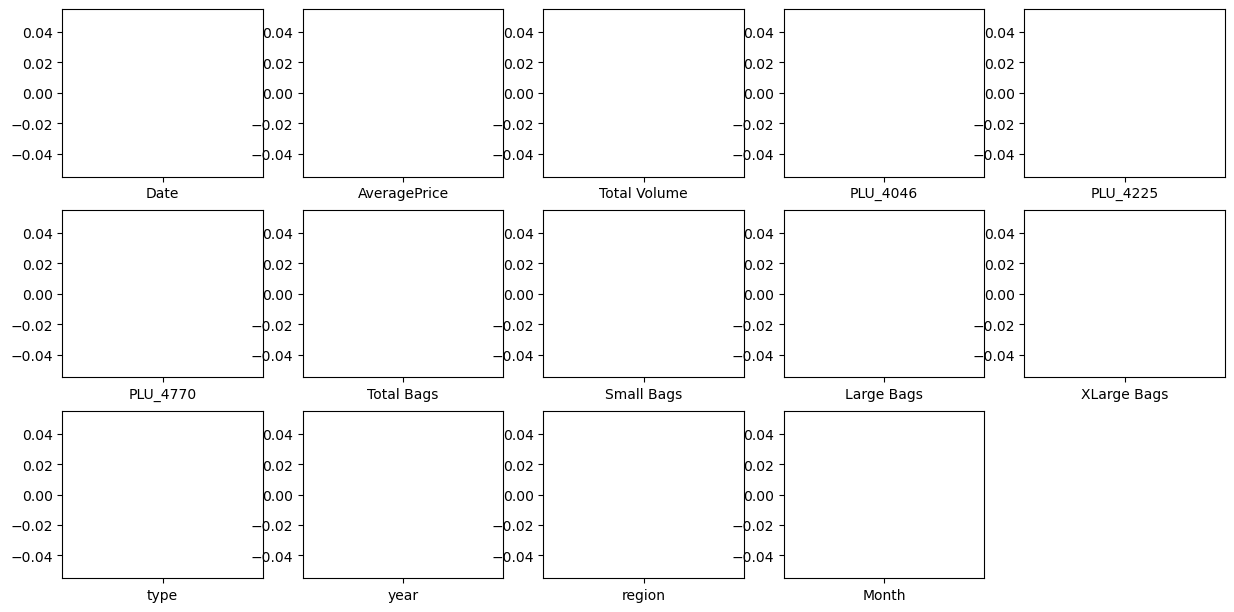

In [48]:
#plotting the boxplot of each column to check the outliers 
df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [49]:
print(df.shape)
print(df_new.shape)
df = df_new
print('Shape after removing outlires',df.shape)

(0, 14)
(0, 14)
Shape after removing outlires (0, 14)


In [50]:
df.skew()

Date           NaN
AveragePrice   NaN
Total Volume   NaN
PLU_4046       NaN
PLU_4225       NaN
PLU_4770       NaN
Total Bags     NaN
Small Bags     NaN
Large Bags     NaN
XLarge Bags    NaN
type           NaN
year           NaN
region         NaN
Month          NaN
dtype: float64

In [51]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','PLU_4046','PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [52]:

df.skew()

Date           NaN
AveragePrice   NaN
Total Volume   NaN
PLU_4046       NaN
PLU_4225       NaN
PLU_4770       NaN
Total Bags     NaN
Small Bags     NaN
Large Bags     NaN
XLarge Bags    NaN
type           NaN
year           NaN
region         NaN
Month          NaN
dtype: float64

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': 'PLU_4046'}>],
       [<Axes: title={'center': 'PLU_4225'}>,
        <Axes: title={'center': 'PLU_4770'}>,
        <Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>],
       [<Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'type'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

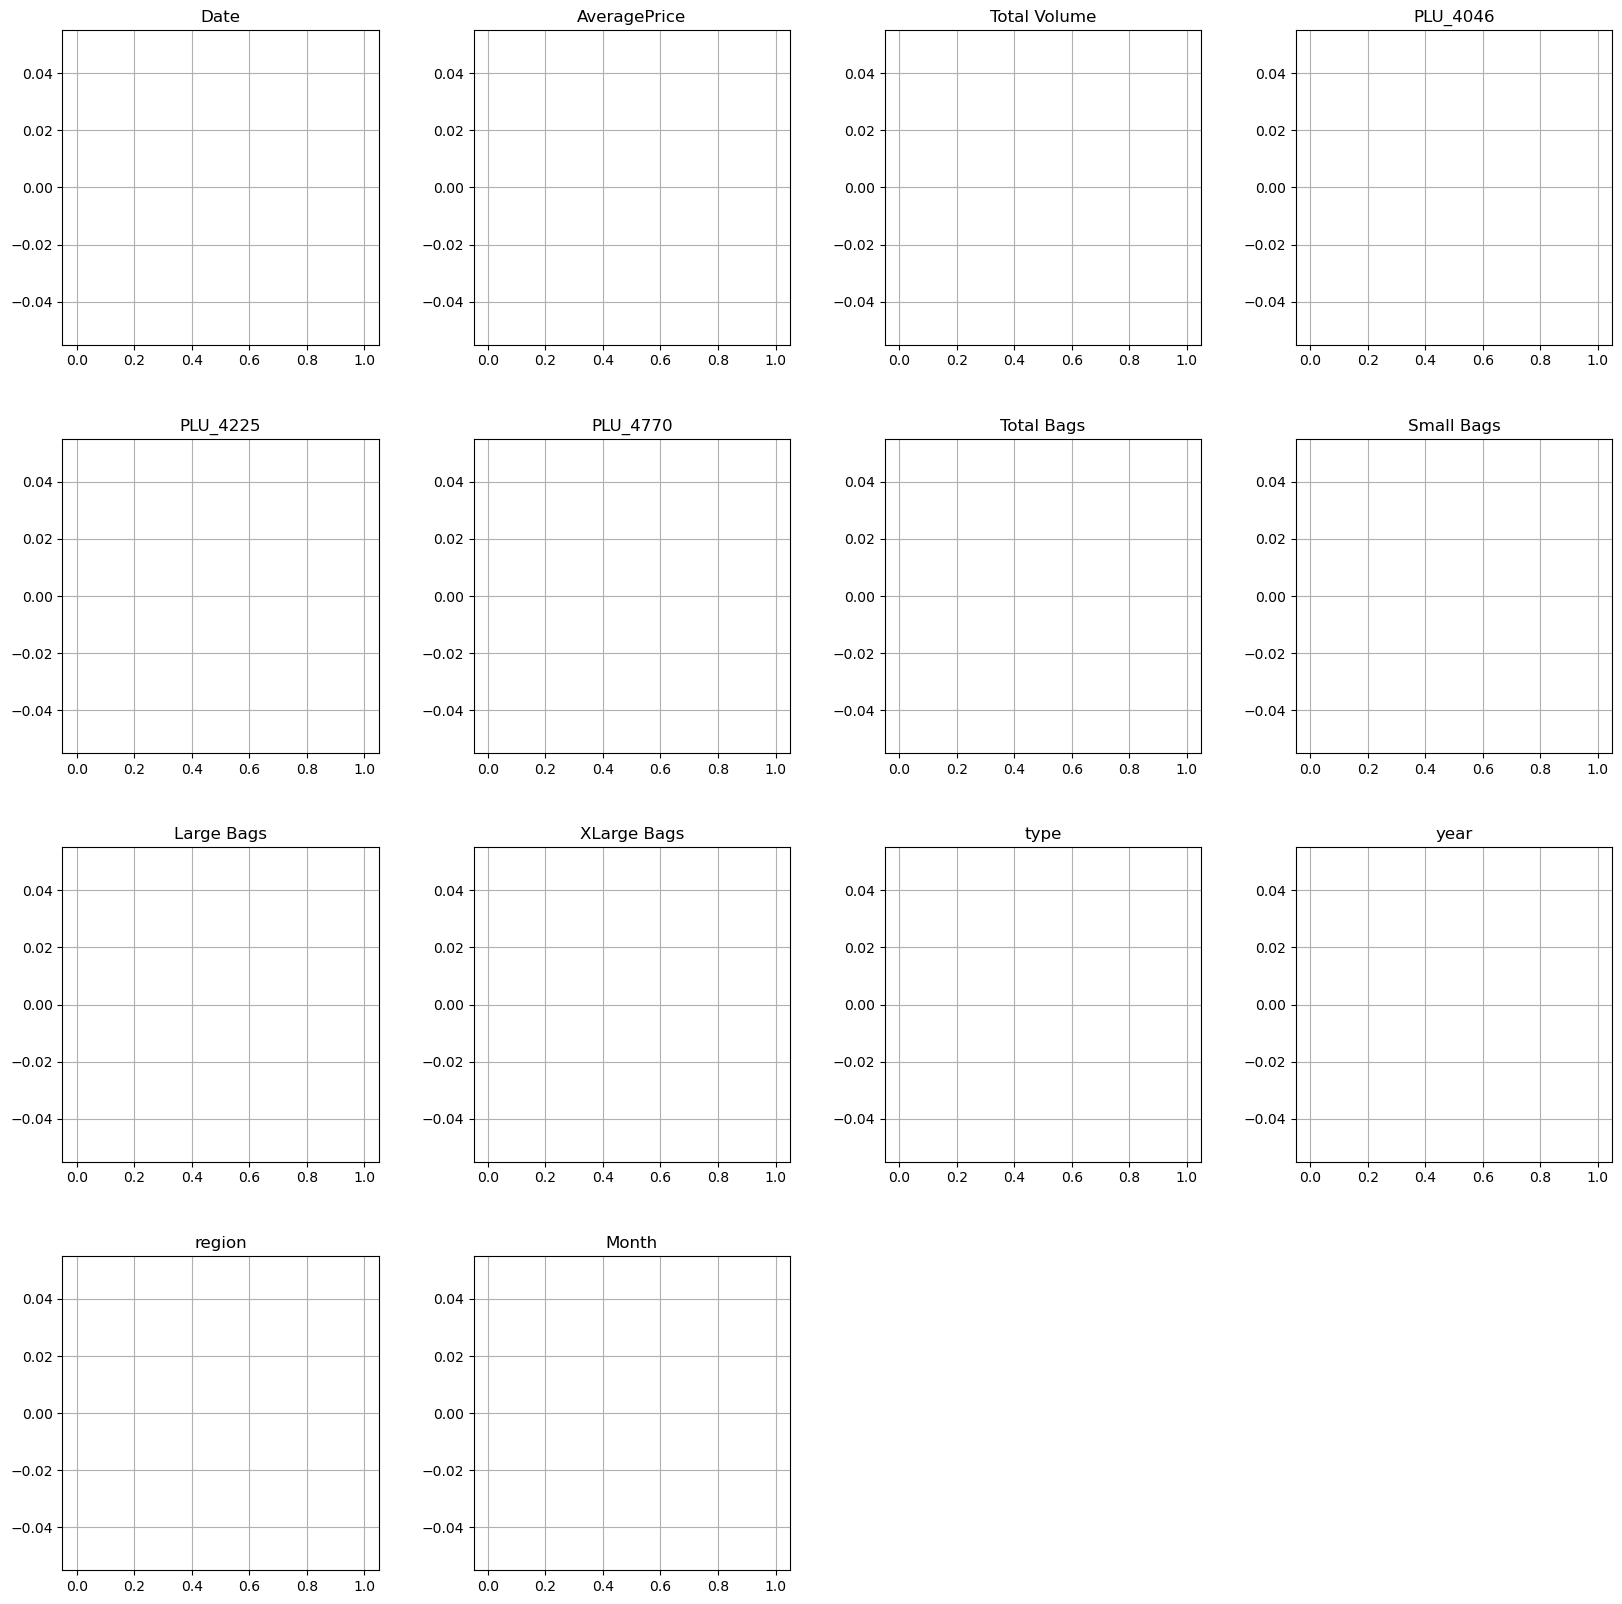

In [53]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

In [54]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['AveragePrice','Date'])
y = df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(0, 12)
(0, 1)


In [ ]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [ ]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

In [ ]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 80,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(LA,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

In [ ]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

In [ ]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [ ]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


#assign the value of x and y for training and testing phase
x_c = df.drop(columns=['region','Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

In [ ]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [ ]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)
        

In [ ]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 76,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

In [ ]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

In [ ]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

In [ ]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

In [ ]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [ ]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

NameError: name 'fpr' is not defined

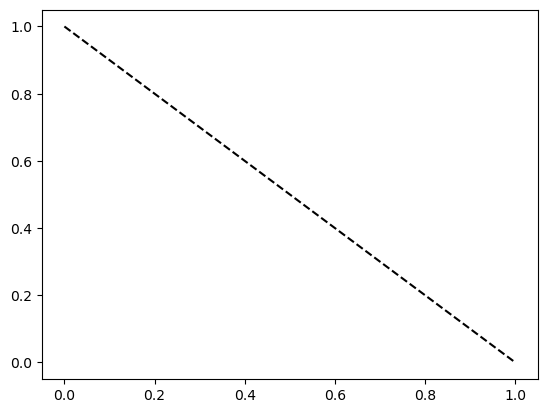

In [63]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()